In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Context

Anti-phishing refers to efforts to block phishing attacks. Phishing is a kind of cybercrime where attackers pose as known or trusted entities and contact individuals through email, text or telephone and ask them to share sensitive information. Typically, in a phishing email attack, and the message will suggest that there is a problem with an invoice, that there has been suspicious activity on an account, or that the user must login to verify an account or password. Users may also be prompted to enter credit card information or bank account details as well as other sensitive data. Once this information is collected, attackers may use it to access accounts, steal data and identities, and download malware onto the user’s computer.
Content

This dataset contains 48 features extracted from 5000 phishing webpages and 5000 legitimate webpages, which were downloaded from January to May 2015 and from May to June 2017. An improved feature extraction technique is employed by leveraging the browser automation framework (i.e., Selenium WebDriver), which is more precise and robust compared to the parsing approach based on regular expressions.

Anti-phishing researchers and experts may find this dataset useful for phishing features analysis, conducting rapid proof of concept experiments or benchmarking phishing classification models.
Acknowledgements

Tan, Choon Lin (2018), “Phishing Dataset for Machine Learning: Feature Evaluation”, Mendeley Data, V1, doi: 10.17632/h3cgnj8hft.1
Source of the Dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Phishing_Legitimate_full.csv')

In [5]:
df.head()


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


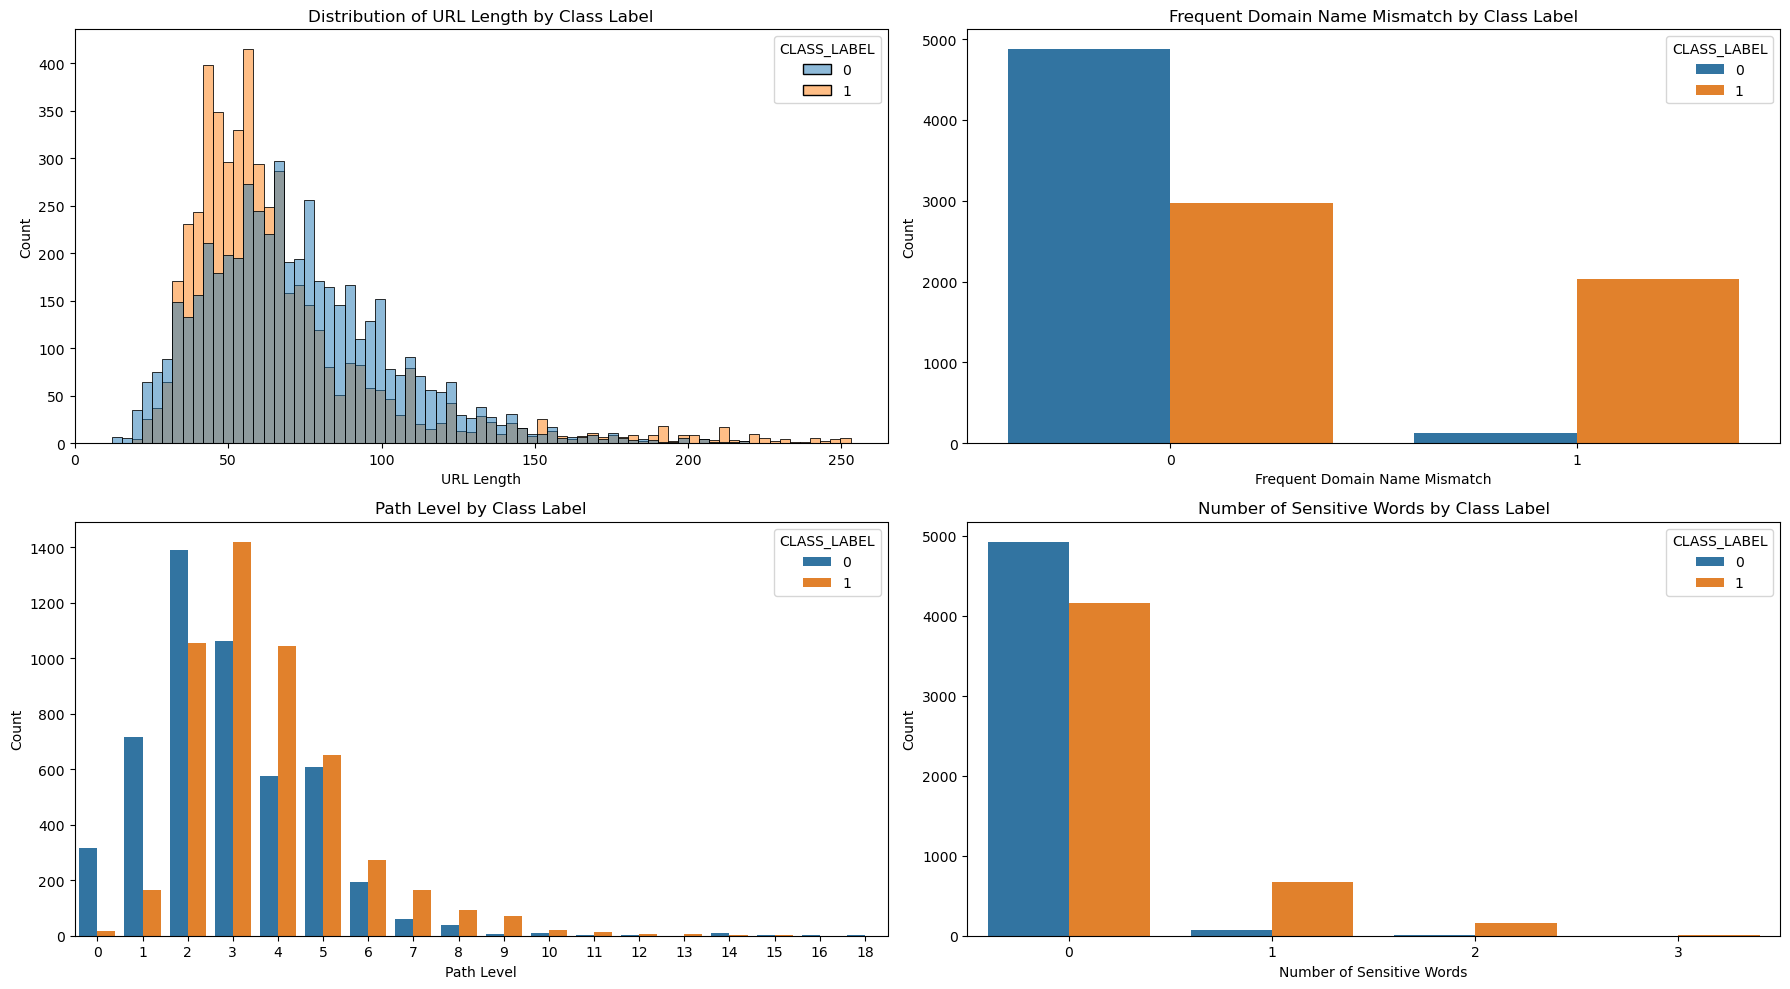

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

(ax1, ax2), (ax3, ax4) = axes

sns.histplot(data=df, x='UrlLength', hue='CLASS_LABEL', ax=ax1)
ax1.set_title('Distribution of URL Length by Class Label')
ax1.set_xlabel('URL Length')
ax1.set_ylabel('Count')

sns.countplot(data=df, x='FrequentDomainNameMismatch', hue='CLASS_LABEL', ax=ax2)
ax2.set_title('Frequent Domain Name Mismatch by Class Label')
ax2.set_xlabel('Frequent Domain Name Mismatch')
ax2.set_ylabel('Count')

sns.countplot(data=df, x='PathLevel', hue='CLASS_LABEL', ax=ax3)
ax3.set_title('Path Level by Class Label')
ax3.set_xlabel('Path Level')
ax3.set_ylabel('Count')

sns.countplot(data=df, x='NumSensitiveWords', hue='CLASS_LABEL', ax=ax4)
ax4.set_title('Number of Sensitive Words by Class Label')
ax4.set_xlabel('Number of Sensitive Words')
ax4.set_ylabel('Count')

plt.tight_layout()

In [7]:
pca = PCA(n_components=2)
pca = PCA(n_components=3)
pca_3d = pca.fit_transform(df.drop(columns='CLASS_LABEL'))
pca_df = pd.DataFrame(pca_3d, columns=['PCA1', 'PCA2', 'PCA3'])
pca_3d = pd.concat([df['CLASS_LABEL'], pca_df], axis=1)

Text(0.5, 0.92, 'Graphical representation with dimensional reduction by diagnosis (PCA)')

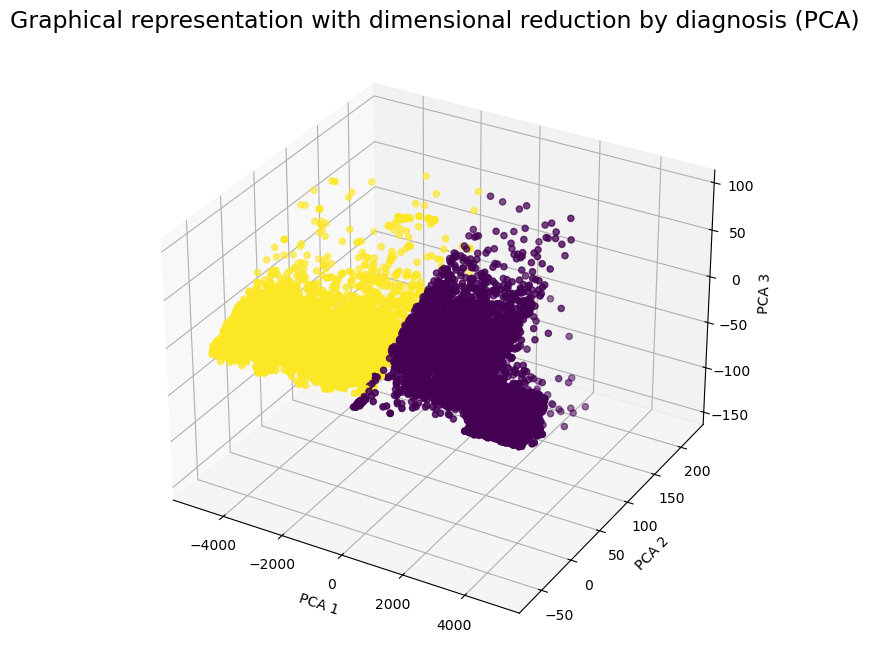

In [8]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

fg = ax.scatter3D(pca_3d['PCA1'], pca_3d['PCA2'], pca_3d['PCA3'], 
                  c=pca_3d['CLASS_LABEL'], cmap='viridis')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.title('Graphical representation with dimensional reduction by diagnosis (PCA)', fontsize=17)

<Axes: xlabel='PCA1', ylabel='PCA2'>

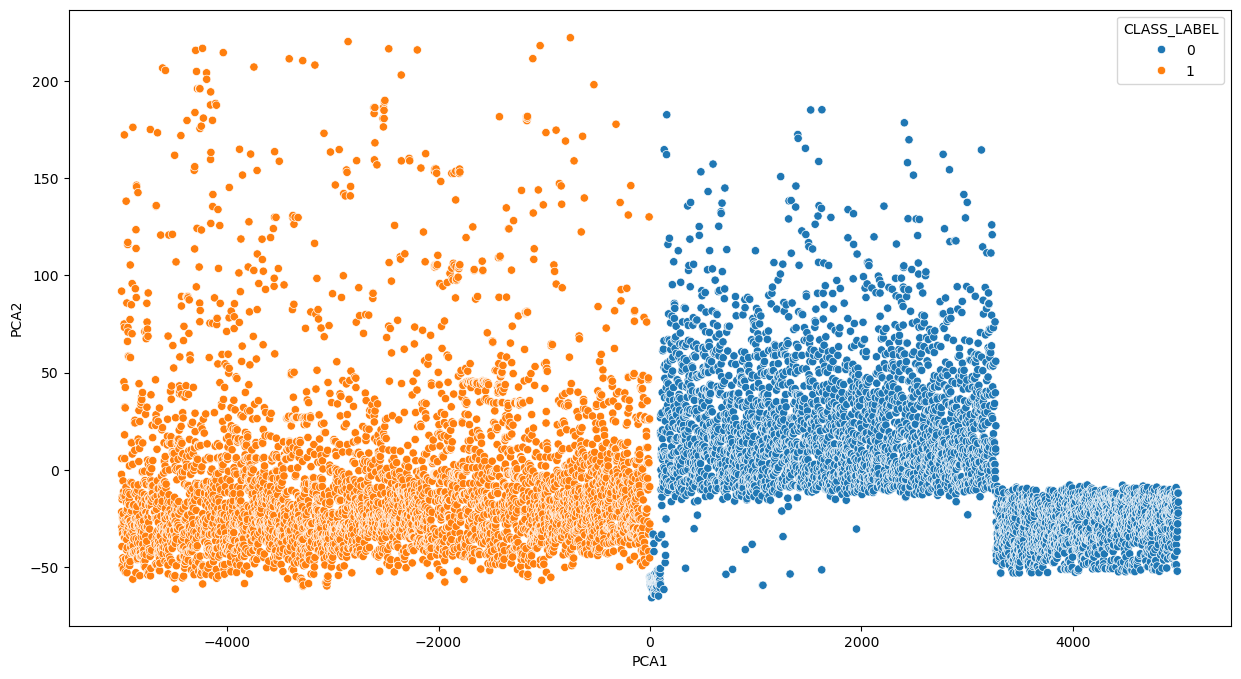

In [9]:
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(df.drop(columns='CLASS_LABEL'))
pca_df2 = pd.DataFrame(pca_2d, columns=['PCA1', 'PCA2'])
pca_2d = pd.concat([df['CLASS_LABEL'], pca_df2], axis=1)


#pca_df = pca_df.rename(columns={0:'PCA1',1:'PCA2',2:'PCA3'})
pca_2d = pca_2d.rename(columns={0:'PCA1',1:'PCA2'})

plt.figure(figsize=(15,8))
pca_2d_plot = sns.scatterplot(data=pca_2d, x='PCA1', y='PCA2', hue='CLASS_LABEL')
pca_2d_plot

<Axes: >

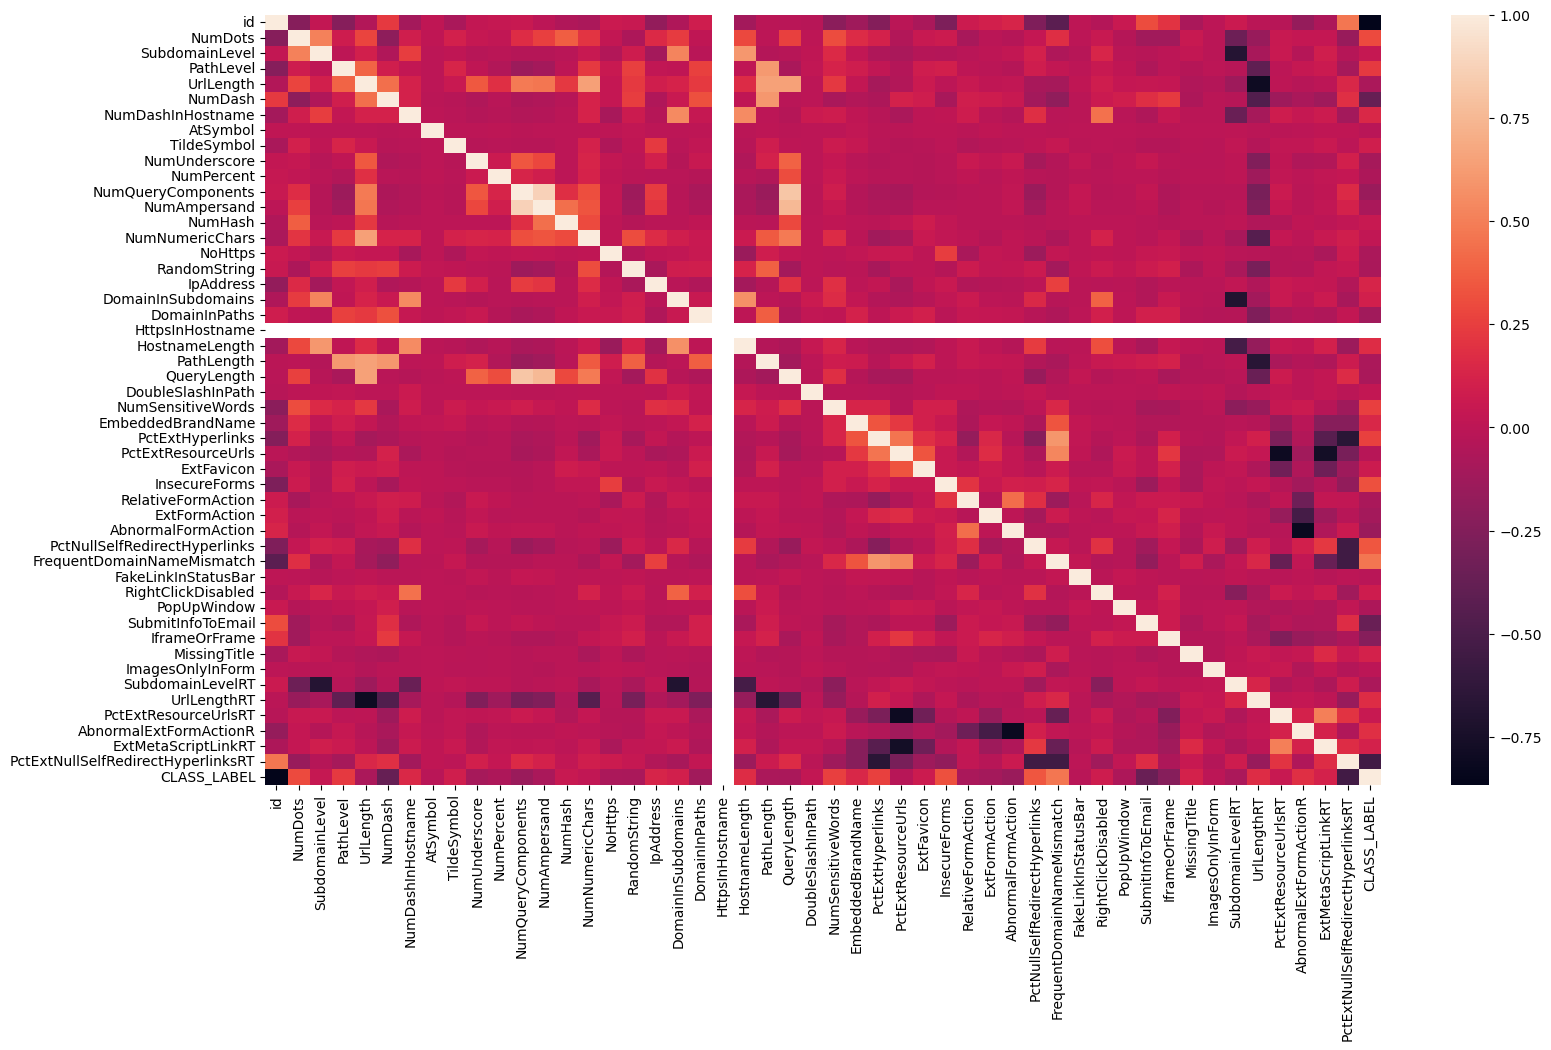

In [10]:
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr)

<Axes: >

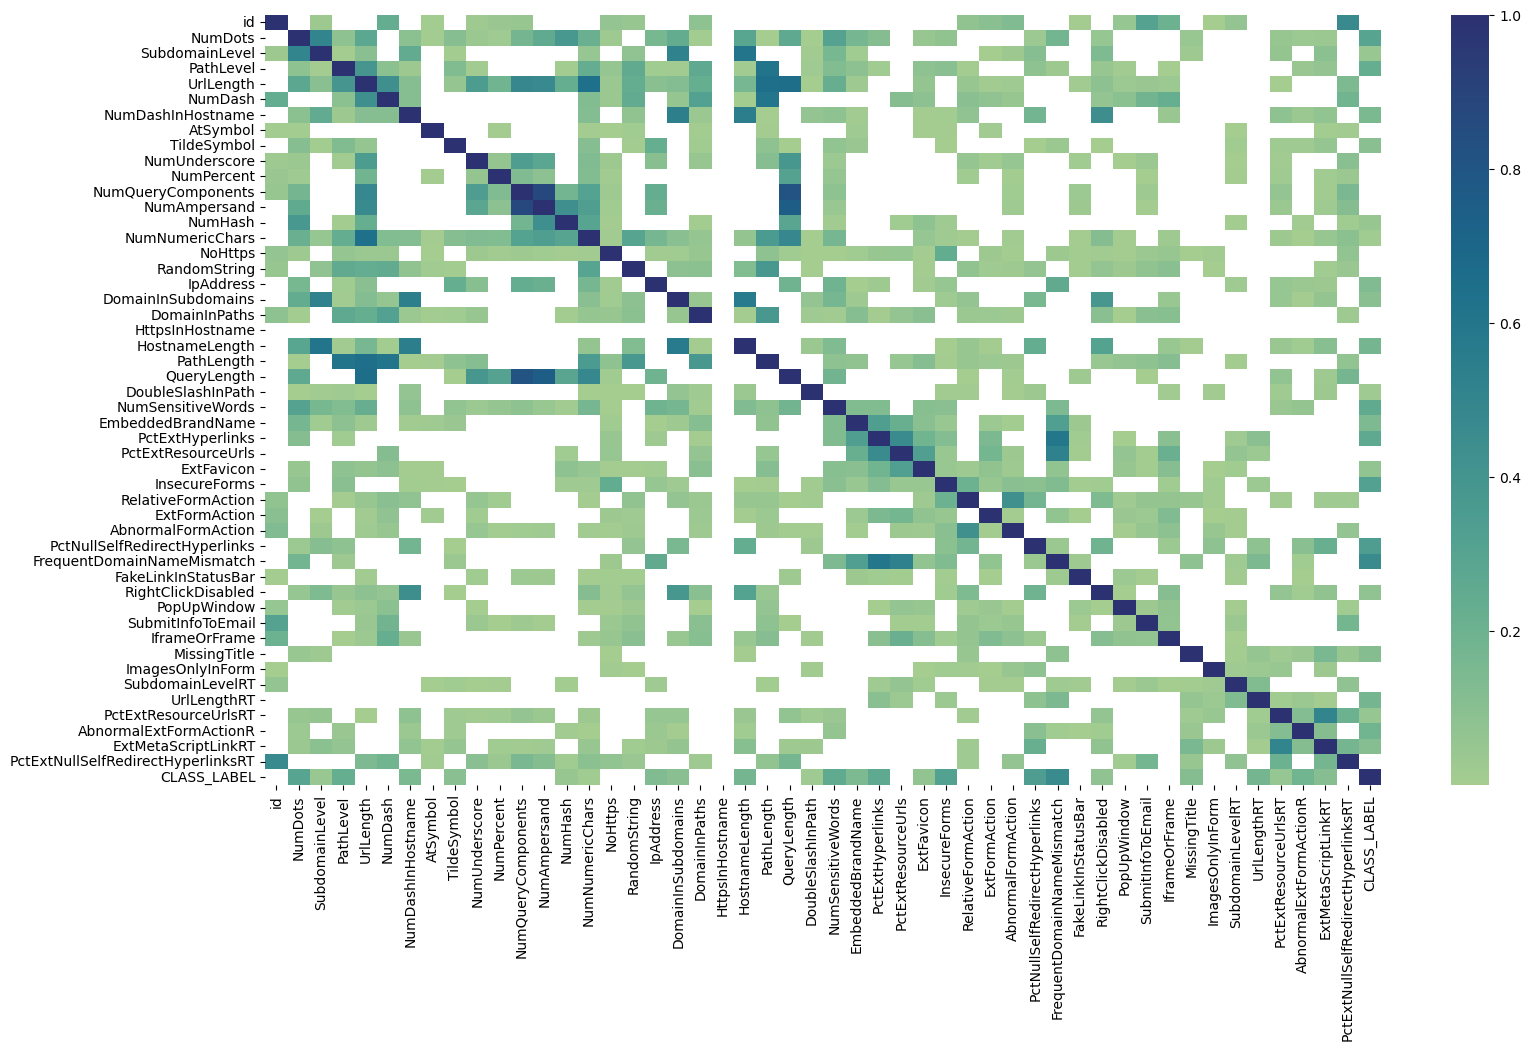

In [11]:
plt.figure(figsize=(18,10))
p_corr_matrix = corr.map(lambda x: x if x > 0 else np.nan)
sns.heatmap(data=p_corr_matrix, cmap='crest')

In [12]:
p_corr = pd.DataFrame(corr['CLASS_LABEL']).query('CLASS_LABEL > 0 & CLASS_LABEL != 1').sort_values(by='CLASS_LABEL')*100
corr['CLASS_LABEL'].sort_values(ascending=False)*100

CLASS_LABEL                           100.000000
FrequentDomainNameMismatch             46.395606
PctNullSelfRedirectHyperlinks          34.280619
InsecureForms                          31.637952
NumDots                                29.411137
PctExtHyperlinks                       25.972792
NumSensitiveWords                      25.520807
PathLevel                              22.945039
AbnormalExtFormActionR                 18.579902
UrlLengthRT                            16.951321
HostnameLength                         16.915689
NumDashInHostname                      15.044434
EmbeddedBrandName                      14.178981
IpAddress                              13.229141
MissingTitle                           11.669345
ExtMetaScriptLinkRT                    11.115036
DomainInSubdomains                     10.045238
TildeSymbol                             9.586372
RightClickDisabled                      7.489972
ExtFavicon                              6.914029
PctExtResourceUrlsRT

<Axes: >

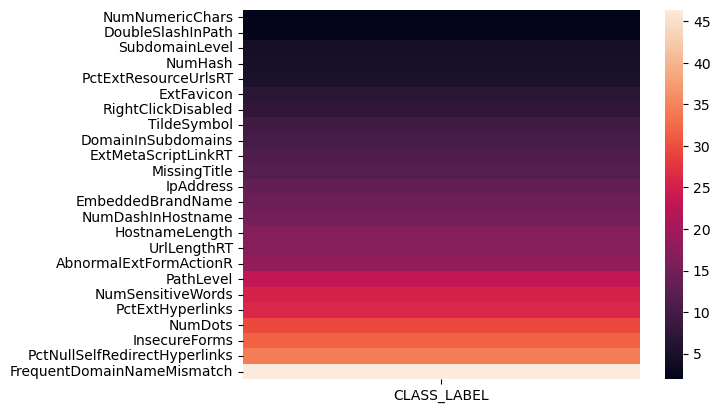

In [13]:
sns.heatmap(data=p_corr)

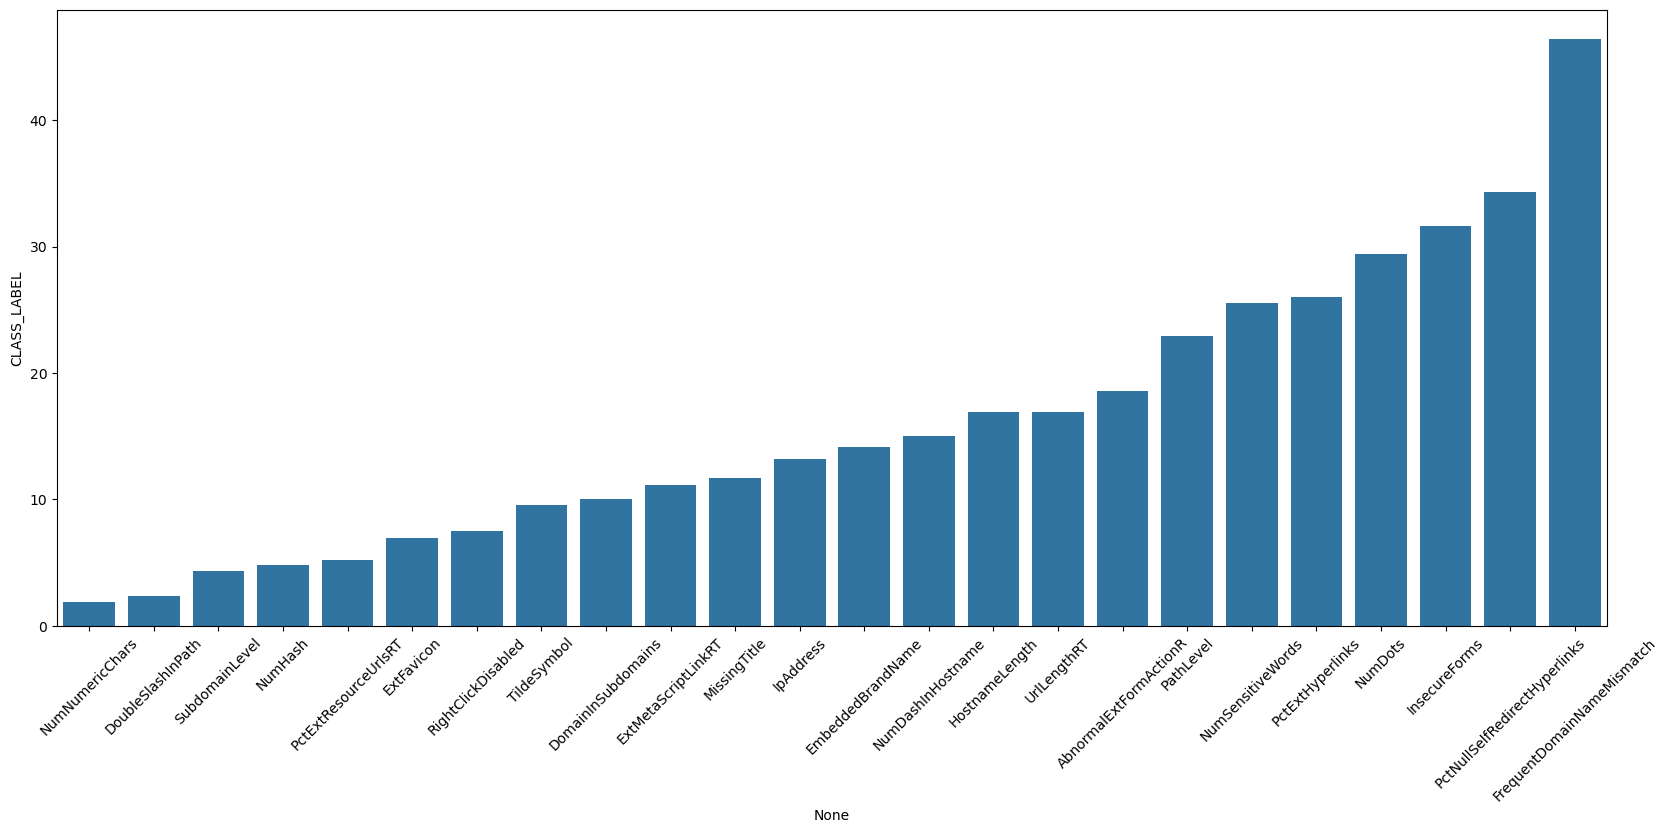

In [14]:
plt.figure(figsize=(20,8))
sns.barplot(data=p_corr, x=p_corr.index,y='CLASS_LABEL')
plt.tick_params(axis='x', labelrotation=45)

![Logistic Regression GIF](https://miro.medium.com/v2/resize:fit:720/format:webp/0*lzNKQdsjFVaymJTF.gif)

In [15]:
X = df.drop(columns='CLASS_LABEL')
y = df['CLASS_LABEL']
model = LogisticRegression(C=6)

In [16]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores):.2f}')

Cross-validation scores: [0.91  0.992 0.998 0.991 0.791]
Mean cross-validation score: 0.94


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)

In [18]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Regularization: Regularization is a technique used to prevent overfitting by adding a penalty to the loss function. In logistic regression, regularization helps control the complexity of the model by shrinking the coefficients of less important features.

Inverse Regularization Parameter (C):

    C is the inverse of the regularization strength. Smaller values of C specify stronger regularization, while larger values of C specify weaker regularization.
    A high value of C means less regularization (more complex model), while a low value of C means more regularization (simpler model).

In [19]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9927
F1 Score: 0.9928


Text(0.5, 1.0, 'Confusion Matrix')

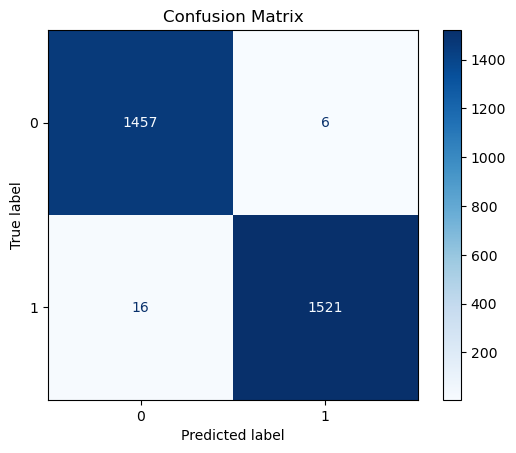

In [20]:
cm = confusion_matrix(y_test, y_pred)

fig = ConfusionMatrixDisplay(confusion_matrix=cm)
fig.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')

In [21]:
X_pca = pca_3d.drop(columns='CLASS_LABEL')
y_pca = pca_3d['CLASS_LABEL']

In [22]:
cv_scores = cross_val_score(model, X_pca, y_pca, cv=5, scoring='accuracy')

# Print cross-validation results
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores):.2f}')

Cross-validation scores: [0.998  1.     1.     1.     0.9975]
Mean cross-validation score: 1.00


In [23]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3 ,random_state=42)

model.fit(X_train_pca, y_train_pca)
y_pred_pca = model.predict(X_test_pca)

Accuracy on test set: 1.00
F1 Score on test set: 1.00


Text(0.5, 1.0, 'Confusion Matrix')

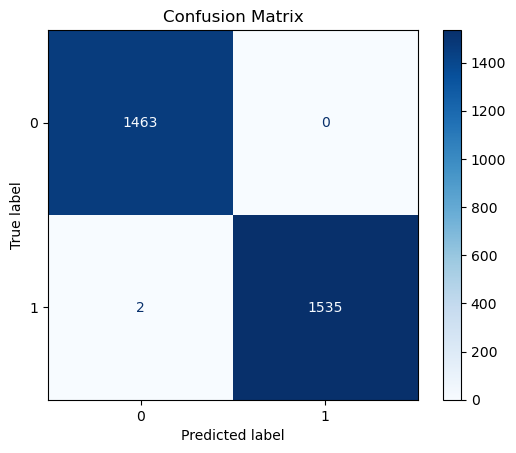

In [24]:
accuracy = accuracy_score(y_test_pca, y_pred_pca)
f1 = f1_score(y_test_pca, y_pred_pca)

print(f'Accuracy on test set: {accuracy:.2f}')
print(f'F1 Score on test set: {f1:.2f}')

cm = confusion_matrix(y_test_pca, y_pred_pca)

fig = ConfusionMatrixDisplay(confusion_matrix=cm)
fig.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')

## Conclusion 1:
#### I have tested other models (Random Forest, Gaussian Naive Bayes, KNN, SVC) and the results are too good to be true. RF, SVC, KNN are overfitting as the Logistic Regression is doing with PCA. The GNB is not overfitting, which is good, but the results are much worse than LR (92% accuracy vs 98%). So I will stick to the Logistic Regression for this usecase.

In [25]:
X_pca_2d = pca_2d.drop(columns='CLASS_LABEL')  

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca_2d)
cluster_labels = kmeans.labels_

df['Cluster'] = cluster_labels

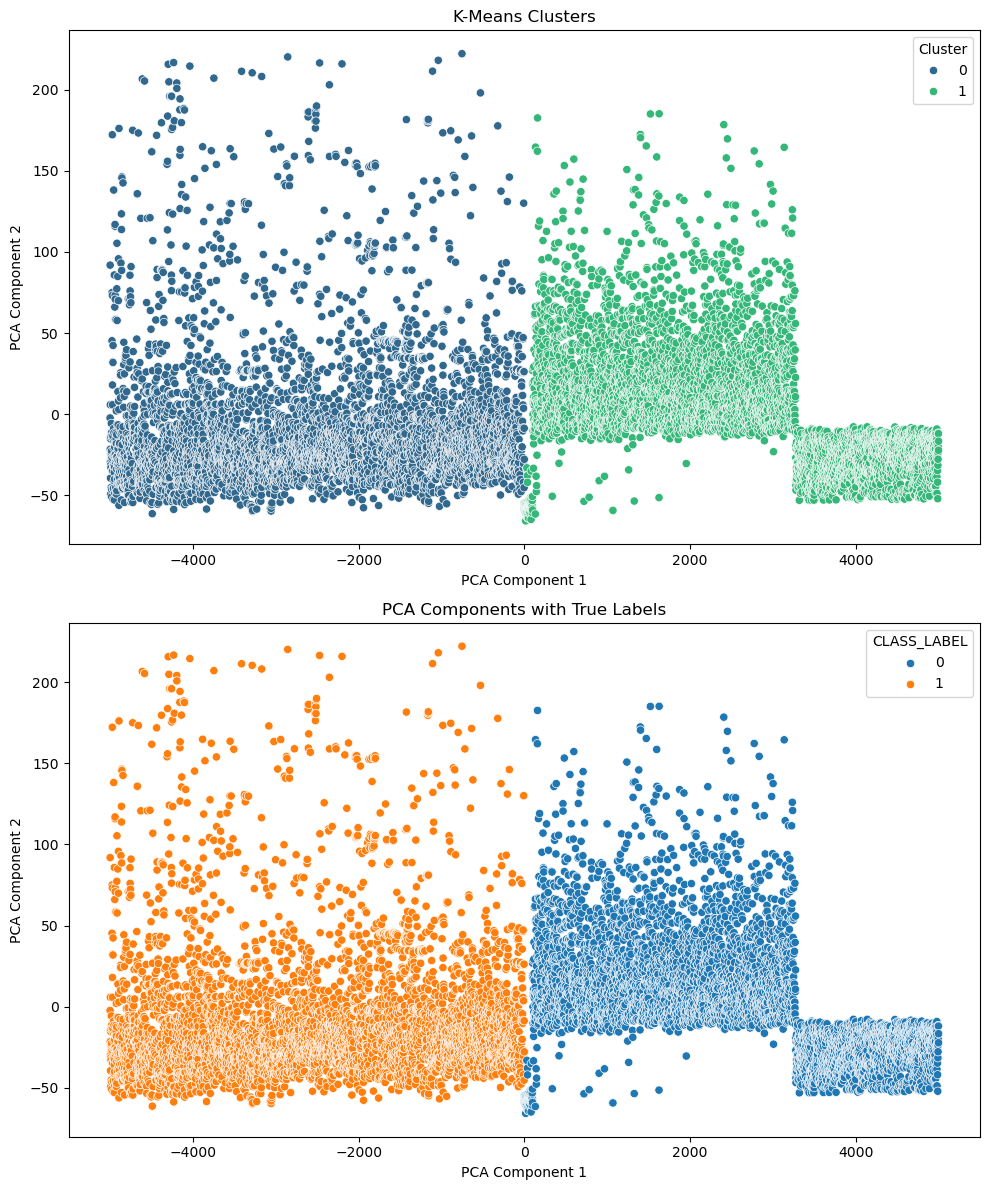

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
custom_palette = ['#1f77b4', '#ff7f0e']


# Plot K-Means clusters
sns.scatterplot(x=X_pca_2d.iloc[:, 0], y=X_pca_2d.iloc[:, 1], hue=cluster_labels, palette='viridis', ax=ax1)
ax1.set_title('K-Means Clusters')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.legend(title='Cluster')

# Plot PCA components with true class labels
pca_2d_plot = sns.scatterplot(data=pca_2d, x='PCA1', y='PCA2', hue='CLASS_LABEL', ax=ax2,palette=custom_palette)
ax2.set_title('PCA Components with True Labels')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.legend(title='CLASS_LABEL')

# Adjust layout
plt.tight_layout()

In [27]:
df_with_clusters = pd.concat([df, pd.Series(cluster_labels, name='Cluster')], axis=1)
comparison_df = df_with_clusters[['CLASS_LABEL', 'Cluster']]
comparison_df

,CLASS_LABEL,Cluster,Cluster
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
9995,0,1,1
9996,0,1,1
9997,0,1,1
9998,0,1,1
